In [32]:
import sys
#sys.path.append("D:\python\lib\site-packages")
import os
import logging
import xdf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
streams = xdf.load_xdf("untitled.xdf")

Importing XDF file untitled.xdf...
  read tag: 1 at 8 bytes, length=58
  read tag: 2 at 71 bytes, length=1920
  found stream openvibeSignal
  read tag: 3 at 1996 bytes, length=3892
  reading [14,68]
  read tag: 3 at 5893 bytes, length=3656
  reading [14,64]
  read tag: 3 at 9554 bytes, length=692
  reading [14,12]
  read tag: 3 at 10251 bytes, length=3656
  reading [14,64]
  read tag: 3 at 13912 bytes, length=3656
  reading [14,64]
  read tag: 3 at 17573 bytes, length=3656
  reading [14,64]
  read tag: 3 at 21234 bytes, length=692
  reading [14,12]
  read tag: 3 at 21931 bytes, length=3656
  reading [14,64]
  read tag: 3 at 25592 bytes, length=3656
  reading [14,64]
  read tag: 3 at 29253 bytes, length=3656
  reading [14,64]
  read tag: 3 at 32914 bytes, length=3884
  reading [14,68]
  read tag: 3 at 36803 bytes, length=3656
  reading [14,64]
  read tag: 4 at 40461 bytes, length=22
  read tag: 3 at 40488 bytes, length=3656
  reading [14,64]
  read tag: 3 at 44149 bytes, length=3656
  r

In [28]:
for i in range(len(streams[0])):
    print(streams[0][i]['info']['name'][0])

openvibeSignal


In [23]:
# We use
streams = []
def exportStream(file_path, stream_name, markers_stream_name=None, subject_number=None, markers_to_write=None):
    """
    file_path -- path to the XDF file
    stream_name -- name of the stream (in the XDF file) that is going to be exported
    markers_stream_none -- name of the stream of markers, if any (optional)
    subject_number -- number of the subject, used only name the generated CSV file
    markers_to_write -- list of markers to be exported if only some are desired (if empty, all markers in markers_stream name will be exported)
    """
    streams = xdf.load_xdf(file_path)
    
    # Find the desired stream
    desired_stream = None
    for i in range (len(streams[0])):
        if streams[0][i]['info']['name'][0] == stream_name:
            desired_stream = streams[0][i]
            break
    
    if desired_stream is None:
        return "Stream " + stream_name + " not found"

    if markers_stream_name is not None and markers_stream_name is not '':
        # Put the data in array, row by row, with a place for the markers
        desired_stream_data = []
        for i in range(len(desired_stream['time_series'])):
            desired_stream_data.append([desired_stream['time_series'][i][0], 0, desired_stream['time_stamps'][i]])
        
        # Find the Marker data
        markers = None
        for i in range (len(streams[0])):
            if streams[0][i]['info']['name'][0] == markers_stream_name:
                markers = streams[0][i]
                break
        
        if markers is None:
            return "Markers stream " + markers_stream_name + " not found"

        # Define function for finding the nearest value in an array
        # Used to find the closest desired stream timestamp that matches the timestamp of each marker
        def find_nearest(array,value):
            idx = (np.abs(array-value)).argmin()
            return idx

        # Add the markers to right rows of desired stream data
        for i in range(len(markers['time_series'])):
            if markers_to_write == None or len(markers_to_write) == 0 or int(markers['time_series'][i]) in markers_to_write:
                index = find_nearest(desired_stream['time_stamps'], markers['time_stamps'][i])
                desired_stream_data[index][1] = int(markers['time_series'][i])

        # Create a dataframe with the desired stream data
        desired_stream_dataframe = pd.DataFrame(desired_stream_data, columns=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"])
    else:
        # Put the data in array, row by row
        desired_stream_data = []
        #for i in range(len(desired_stream['time_series'])):
            #desired_stream_data.append([desired_stream['time_series'][i][0], desired_stream['time_stamps'][i]])
            
        for i in range(len(desired_stream['time_series'])):
            desired_stream_data.append([desired_stream['time_stamps'][i], desired_stream['time_series'][i][0], 
                                        desired_stream['time_series'][i][1], desired_stream['time_series'][i][2], 
                                        desired_stream['time_series'][i][3], desired_stream['time_series'][i][4], 
                                        desired_stream['time_series'][i][5], desired_stream['time_series'][i][6], 
                                        desired_stream['time_series'][i][7], desired_stream['time_series'][i][8], 
                                        desired_stream['time_series'][i][9], desired_stream['time_series'][i][10],
                                       desired_stream['time_series'][i][11], desired_stream['time_series'][i][12],
                                       desired_stream['time_series'][i][13]])
        # Create a dataframe with the desired stream data
        desired_stream_dataframe = pd.DataFrame(desired_stream_data, columns=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"])

    # Save the desired stream dataframe to CSV
    desired_stream_dataframe.to_csv("untitled-test.csv", sep=';', index=False)
    print("File created successfully")

In [29]:
exportStream("untitled.xdf", "openvibeSignal", "")

Importing XDF file untitled.xdf...
  read tag: 1 at 8 bytes, length=58
  read tag: 2 at 71 bytes, length=1920
  found stream openvibeSignal
  read tag: 3 at 1996 bytes, length=3892
  reading [14,68]
  read tag: 3 at 5893 bytes, length=3656
  reading [14,64]
  read tag: 3 at 9554 bytes, length=692
  reading [14,12]
  read tag: 3 at 10251 bytes, length=3656
  reading [14,64]
  read tag: 3 at 13912 bytes, length=3656
  reading [14,64]
  read tag: 3 at 17573 bytes, length=3656
  reading [14,64]
  read tag: 3 at 21234 bytes, length=692
  reading [14,12]
  read tag: 3 at 21931 bytes, length=3656
  reading [14,64]
  read tag: 3 at 25592 bytes, length=3656
  reading [14,64]
  read tag: 3 at 29253 bytes, length=3656
  reading [14,64]
  read tag: 3 at 32914 bytes, length=3884
  reading [14,68]
  read tag: 3 at 36803 bytes, length=3656
  reading [14,64]
  read tag: 4 at 40461 bytes, length=22
  read tag: 3 at 40488 bytes, length=3656
  reading [14,64]
  read tag: 3 at 44149 bytes, length=3656
  r

(960, 965)

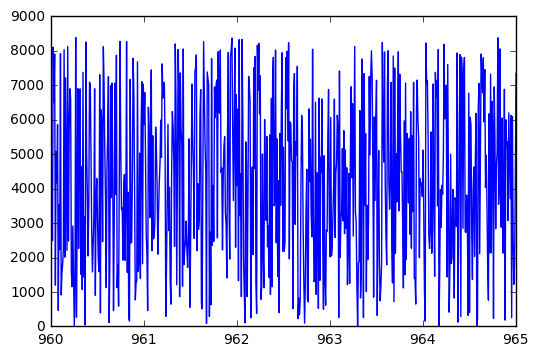

In [37]:
datacsv = pd.read_csv('untitled-test.csv', sep=';')
plt.plot(datacsv['0'], datacsv['1'])
plt.xlim([960, 965]) #Focus on a smaller epoch
#print(datacsv['Time'])
#datacsv

In [ ]:
import numpy as np
import mne

# Read the CSV file as a NumPy array
data = np.loadtxt('untitled-test.csv', delimiter=';')

# Some information about the channels
ch_names = ['time','CH 1','CH 2', 'CH 3', 'CH 4', 'CH 5', 'CH 6', 'CH 7', 'CH 8', 'CH 9', 'CH 10', 'CH 11', 'CH 12', 'CH 13', 'CH 14']

# Sampling rate of the Nautilus machine
sfreq = 128  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data.T, info)

In [ ]:
raw.plot()